In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

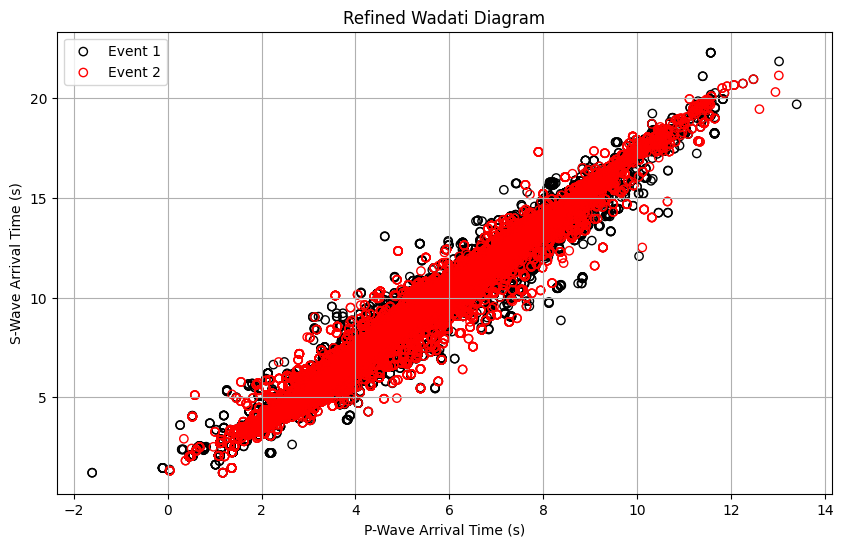

In [8]:
# First, let's read the contents of the provided file to understand its structure and the data it contains.
file_path = 'dt.ct'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()
    
import pandas as pd

# Parsing the file content into a structured DataFrame
data = []

current_event_pair = None
for line in lines:
    if line.startswith('#'):
        current_event_pair = tuple(line.strip().split()[1:3])
    else:
        parts = line.split()
        if len(parts) >= 5:
            record = {
                'EventPair': current_event_pair,
                'Station': parts[0],
                'TT1': float(parts[1]),
                'TT2': float(parts[2]),
                'Weight': float(parts[3]),
                'Phase': parts[4]
            }
            data.append(record)

# Creating a DataFrame from the parsed data
df = pd.DataFrame(data)

# Separate the data for P and S waves
df_p = df[df['Phase'] == 'P']
df_s = df[df['Phase'] == 'S']

# Join the P and S wave data on Station and EventPair
merged_df = pd.merge(df_p, df_s, on=['Station', 'EventPair'], suffixes=('_P', '_S'))

# Now let's plot the Wadati diagram using this refined data
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['TT1_P'], merged_df['TT1_S'], edgecolor='k', facecolor='none', label='Event 1')
plt.scatter(merged_df['TT2_P'], merged_df['TT2_S'], edgecolor='r', facecolor='none', label='Event 2')
plt.title("Refined Wadati Diagram")
plt.xlabel("P-Wave Arrival Time (s)")
plt.ylabel("S-Wave Arrival Time (s)")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
x=np.array(merged_df['TT2_S'])
y=np.array(merged_df['TT2_P'])
m,c = np.polyfit(x,y,1)
ratio = m+1

ratio

1.5860257379187757

### 

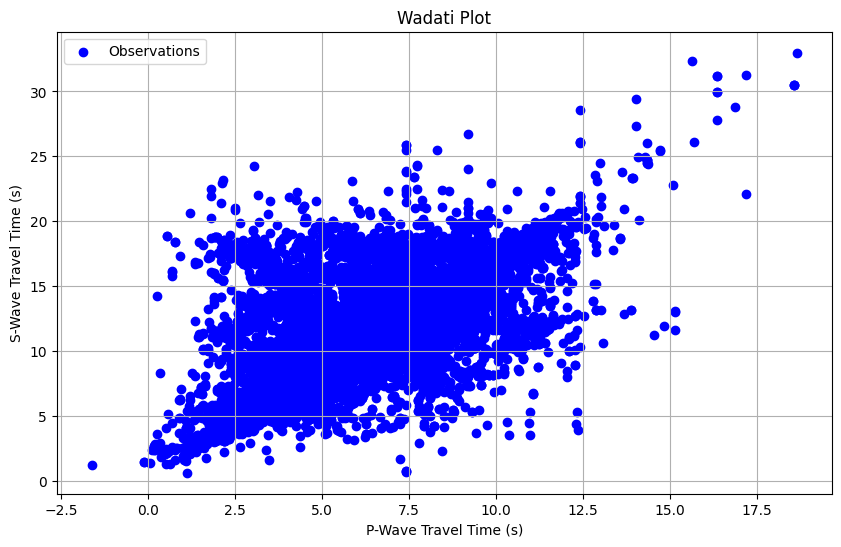

1.4699660562970234

In [18]:
# First, I will read the contents of the uploaded file to understand its structure and data format.
file_path = 'hypoDD.pha'

# Reading the file
with open(file_path, 'r') as file:
    file_contents = file.readlines()

# Displaying the first few lines of the file for analysis
file_contents[:10]


# Initializing lists to store the extracted data
p_wave_times = []
s_wave_times = []
current_event_p_time = None

# Processing the file line by line
for line in file_contents:
    if line.startswith('#'):
        # Start of a new earthquake event, reset the current P-wave time
        current_event_p_time = None
    else:
        # Extracting data from the observation line
        parts = line.split()
        station, travel_time, weight, phase = parts[0], float(parts[1]), float(parts[2]), parts[3]

        # For P-waves, store the travel time for comparison with S-waves
        if phase == 'P':
            current_event_p_time = travel_time
        elif phase == 'S' and current_event_p_time is not None:
            # For S-waves, store the time difference if P-wave time is available
            p_wave_times.append(current_event_p_time)
            s_wave_times.append(travel_time)

# Creating a DataFrame for easier plotting
data = {'P-Wave Time': p_wave_times, 'S-Wave Time': s_wave_times}
df = pd.DataFrame(data)

# Plotting the Wadati plot
plt.figure(figsize=(10, 6))
plt.scatter(df['P-Wave Time'], df['S-Wave Time'], color='blue', label='Observations')
plt.xlabel('P-Wave Travel Time (s)')
plt.ylabel('S-Wave Travel Time (s)')
plt.title('Wadati Plot')
plt.grid(True)
plt.legend()
plt.show()

x=np.array(df['S-Wave Time'])
y=np.array(df['P-Wave Time'])
m,c = np.polyfit(x,y,1)
ratio = m+1

ratio